In [3]:
import numpy as np
import torch
import subprocess
import matplotlib.pyplot as plt

In [22]:
scenarios = ["classic","coin-heaven","loot-crate"]
me = "forth_agent"
command = "python main.py play --scenario {} --agents {} --n-rounds {} --train 0 --continue-without-training --no-gui --save-stats"
rounds = 100

In [24]:
agents = f"{me} peaceful_agent coin_collector_agent"
scenario = "classic"
a = subprocess.call(command.format(scenario,agents,rounds).split(" "))

100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


In [3]:
# run tests:


for scenario in scenarios:
    agents = f"{me} rule_based_agent"
    a = subprocess.call(command.format(scenario,agents,rounds).split(" "))

for scenario in scenarios:
    agents = f"{me} rule_based_agent rule_based_agent rule_based_agent"
    a = subprocess.call(command.format(scenario,agents,rounds).split(" "))




100%|██████████| 100/100 [01:11<00:00,  1.41it/s]


[3.77333333 3.77666667 2.99333333]


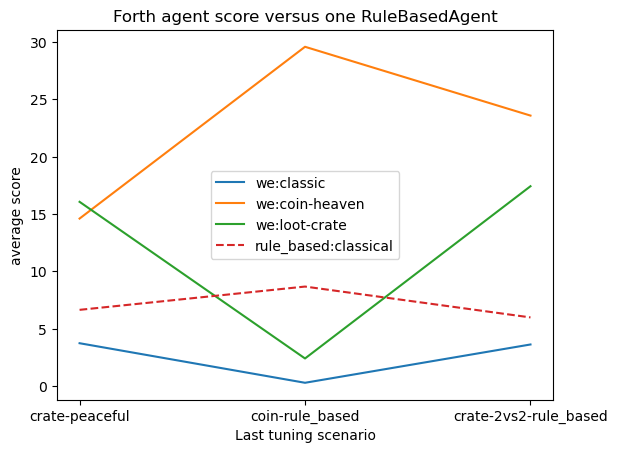

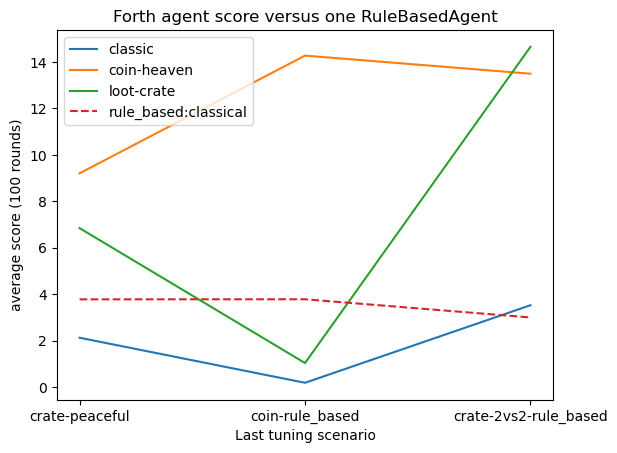

In [21]:
x = ["crate-peaceful","coin-rule_based","crate-2vs2-rule_based"]
# our scores with one opponent
classic_one = np.array([374,29,363]) / 100
heaven_one =np.array( [1461,2959,2359])/ 100
loot_one = np.array([1607,241,1743])/ 100

# the opponents scores on classic
ops_classical_one = np.array([665,868,599]) /100


classic =np.array( [212,18,352])/ 100
heaven = np.array([920,1427,1349])/ 100
loot = np.array([684,103,1465])/ 100

ops_classical= np.array([[428,383,321],[385,356,392],[297,320,281]]).mean(axis=1) / 100
print(ops_classical )

plt.plot(x,classic_one,label="we:classic")
plt.plot(x,heaven_one,label="we:coin-heaven")
plt.plot(x,loot_one,label="we:loot-crate")
plt.plot(x,ops_classical_one,label="rule_based:classical",linestyle="dashed")
plt.title("Forth agent score versus one RuleBasedAgent")
plt.xlabel("Last tuning scenario")
plt.ylabel("average score (100 rounds)")
plt.legend()
plt.show()
plt.plot(x,classic,label="classic")
plt.plot(x,heaven,label="coin-heaven")
plt.plot(x,loot,label="loot-crate")
plt.plot(x,ops_classical,label="rule_based:classical",linestyle="dashed")
plt.title("Forth agent score versus one RuleBasedAgent")
plt.xlabel("Last tuning scenario")
plt.ylabel("average score (100 rounds)")
plt.legend()
plt.show()
# We just smoked the ops!!